In [1]:
from GPyOpt.methods import BayesianOptimization
import numpy as np
from numpy.random import randn
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(24)

In [3]:
def one_dim(x):
    #1-D
    #optimum at x=0.96609, f(x)=-1.48907
    return -(1.4-3*x)*np.sin(18*x)+randn()*sigma
bounds_one_dim = [{'name':'x', 'type':'continuous', 'domain':(0, 1.2)}]

In [4]:
def booth(X):
    #2-D
    #optimum at X=[1,3] f(X)=0
    X = np.atleast_2d(X)
    x = X[:, 0]
    y = X[:, 1]
    return((x+2*y-7)**2+(2*x+y-5)**2)+randn()*sigma
bounds_booth = [{'name': 'x', 'type': 'continuous', 'domain': (-10,10)}]

In [5]:
def sphere(X):
    #n-D
    #optimum at X = [0,...,0], f(X)=0
    X = np.atleast_2d(X)
    return(np.sum(np.power(X,2), 1))+randn()*sigma
bounds_sphere = [{'name': 'x', 'type': 'continuous', 'domain': (-1,1)}]

In [6]:
def rastrigin(X):
    #n-D
    #optimum at X=[0,...,0], f(X)=0
    X = np.atleast_2d(X)
    return(10*len(X[0])+np.sum(np.power(X,2)-10*np.cos(2*np.pi*X),1))+randn()*sigma
bounds_rastrigin = [{'name': 'x', 'type': 'continuous', 'domain': (-5.12,5.12)}]

Hyperparameter testing done in gpyopt_test.py

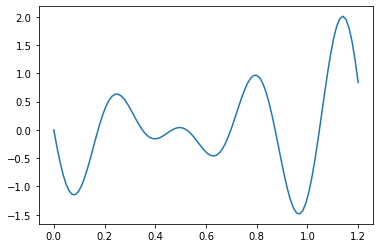

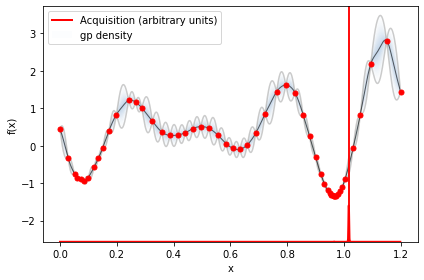

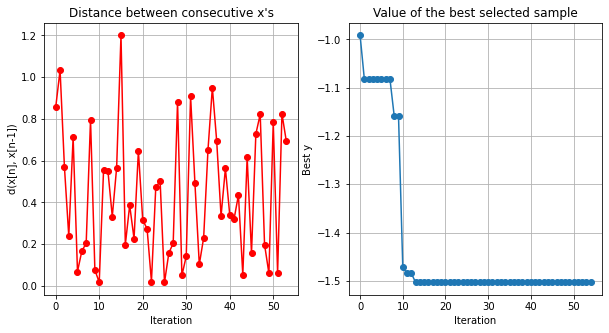

[0.96622895] -1.5033569263128612


In [7]:
# demonstrate with 1D - acquisition, noise effect, convergence
sigma=0
xdata = np.linspace(0, 1.2, 100)
ydata = [one_dim(x) for x in xdata]
plt.plot(xdata, ydata)
plt.show()
sigma = 0.01
myOpt = BayesianOptimization(one_dim, domain=bounds_one_dim, exact_feval=True, model="GP")
myOpt.run_optimization(max_iter=50, eps=1e-6)
myOpt.plot_acquisition()
myOpt.plot_convergence()
myOpt.save_evaluations("eval.txt")
print(myOpt.x_opt, myOpt.fx_opt)

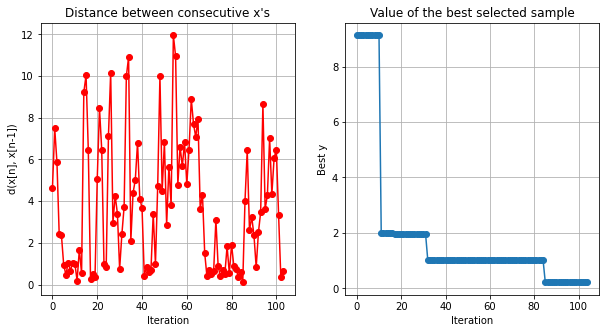

[-0.01090498 -0.03097159] 0.21329208925551058


In [9]:
# show convergence for high dimension optimisation
sigma = 0
n=2
myOpt = BayesianOptimization(rastrigin, domain=bounds_rastrigin*n, exact_feval=True)
myOpt.run_optimization(max_iter=100, eps=1e-6)
myOpt.plot_convergence()
print(myOpt.x_opt, myOpt.fx_opt)

In [11]:
myOpt.get_evaluations()

(array([[-1.16390229e+00, -1.09486611e+00],
        [ 1.71013994e+00, -4.75611011e+00],
        [ 3.34053407e+00,  2.56508364e+00],
        [-2.11579595e+00,  4.36766577e-01],
        [-3.89382272e+00, -1.20259326e+00],
        [-1.59966771e+00, -1.79191036e+00],
        [-1.19933821e+00, -9.20429266e-01],
        [-7.53561901e-01, -1.05678864e+00],
        [-1.05530921e-02, -1.80740528e+00],
        [ 6.14005433e-01, -1.55638871e+00],
        [-3.81468054e-01, -1.79153678e+00],
        [-9.98135209e-01, -9.97065991e-01],
        [-9.25823573e-01, -8.19471250e-01],
        [ 1.00429558e-01, -2.14398217e+00],
        [ 1.19075527e-01, -2.68972394e+00],
        [-5.02994267e+00,  4.96375908e+00],
        [-5.01019862e+00, -5.07395227e+00],
        [-1.05517370e+00,  3.56518721e-02],
        [-8.78653300e-01,  2.24950190e-01],
        [-1.28018459e+00, -6.21360434e-02],
        [-9.14152433e-01, -1.21633780e-01],
        [-6.27697554e-01,  4.94832679e+00],
        [ 4.97500031e+00, -1.380

In [15]:
# get optimisation timing as number of iterations increases
results = pd.DataFrame(None)

n = 10
sigma = 0
max_time = 600
actual_x = [[0]*n]
actual_f = 0
acq_type = "LCB"

for seed in [1,2,3,4,5]:
    np.random.seed(seed)
    for function in [sphere, rastrigin]:
        if function == sphere:
            domain = bounds_sphere*n
            func_name = "sphere"
        else:
            domain = bounds_rastrigin*n
            func_name = "rastrigin"
        
        for max_iter in [170]:
            myOpt = BayesianOptimization(function,
                                        domain=domain,
                                        acquisition_type=acq_type,
                                        exact_feval = True)
            myOpt.run_optimization(max_iter = max_iter, max_time = max_time, eps=1e-6)
            
            result = {"n": n,"function":func_name, "sigma": sigma, "acquisition func": acq_type, "max_it": max_iter, "max_time": max_time, "actual_it": myOpt.num_acquisitions,
                    "actual_time": myOpt.cum_time, 
                    "eucl_dist to true x_opt": float(np.linalg.norm(myOpt.x_opt-actual_x)), 
                    "diff to true f(x_opt)": float(np.abs(function(myOpt.x_opt)-actual_f))}
    
            results = results.append(result, ignore_index=True)
            print(myOpt.x_opt, result)


[-0.00303136  0.00151225  0.00243908 -0.00127456  0.0027788   0.0011744
  0.0005385  -0.00153476  0.00242626 -0.00259466] {'n': 10, 'function': 'sphere', 'sigma': 0, 'acquisition func': 'LCB', 'max_it': 170, 'max_time': 600, 'actual_it': 170, 'actual_time': 77.14332222938538, 'eucl_dist to true x_opt': 0.006589009703483182, 'diff to true f(x_opt)': 4.3415048872595536e-05}
[-1.04301355  5.12       -1.13591333 -0.03449468 -0.99801672  0.07169575
  0.05355324 -0.05862739  0.01460683 -1.99532833] {'n': 10, 'function': 'rastrigin', 'sigma': 0, 'acquisition func': 'LCB', 'max_it': 170, 'max_time': 600, 'actual_it': 170, 'actual_time': 53.50311613082886, 'eucl_dist to true x_opt': 5.795066653160209, 'diff to true f(x_opt)': 42.59649324083276}
[-0.00462457  0.00276119 -0.00128882 -0.0032266  -0.00022142  0.00037261
  0.00616329 -0.00844069 -0.00041554  0.00071311] {'n': 10, 'function': 'sphere', 'sigma': 0, 'acquisition func': 'LCB', 'max_it': 170, 'max_time': 600, 'actual_it': 170, 'actual_ti

In [16]:
results.to_excel("gpyopt_temp_results.xlsx", index=False)

Sparse GP tested in gpyopt_test.py

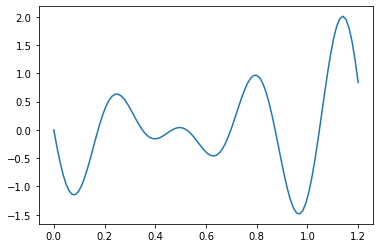

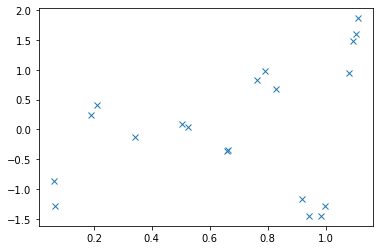

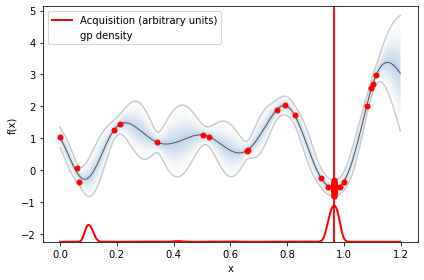

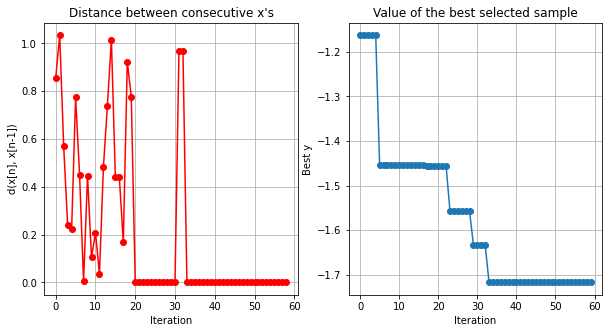

9.864963054656982


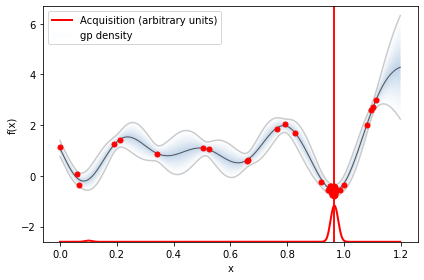

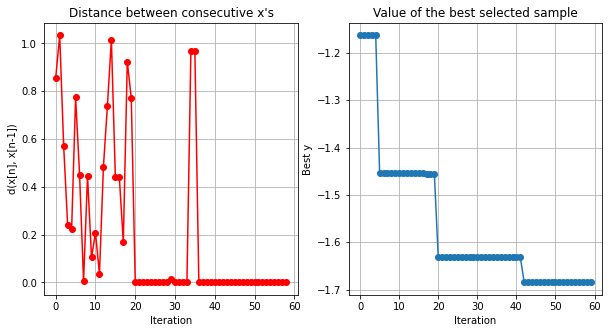

37.337465047836304


In [7]:
# difference between using GP and sparseGP
sigma=0
xdata = np.linspace(0, 1.2, 100)
ydata = [one_dim(x) for x in xdata]
plt.plot(xdata, ydata)
plt.show()

sigma=0.1
x_samples = np.random.rand(20,1)*1.2
y_samples = np.array([one_dim(x) for x in x_samples])
plt.plot(x_samples, y_samples, "x")
plt.show()

myOpt = BayesianOptimization(one_dim, X=x_samples, Y=y_samples, domain=bounds_one_dim, model_type="GP")
myOpt.run_optimization(max_iter = 40)
myOpt.plot_acquisition()
myOpt.plot_convergence()
print(myOpt.cum_time)

myOpt = BayesianOptimization(one_dim, X=x_samples, Y=y_samples, domain=bounds_one_dim, model_type="sparseGP", num_inducing=10)
myOpt.run_optimization(max_iter = 40)
myOpt.plot_acquisition()
myOpt.plot_convergence()
print(myOpt.cum_time)


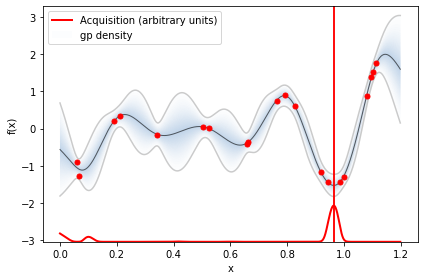

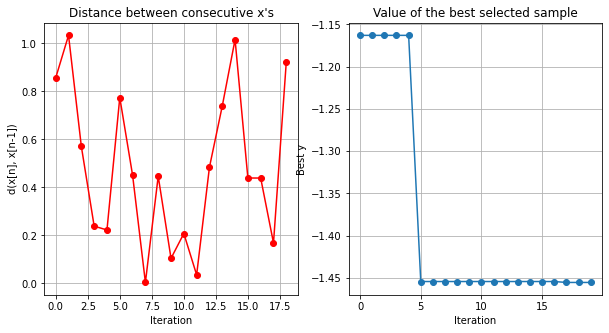

0


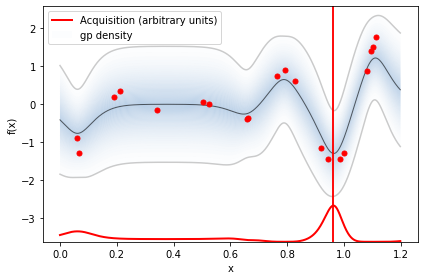

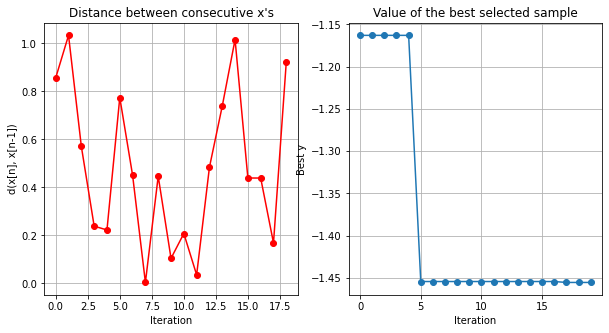

0


In [8]:
myOpt = BayesianOptimization(one_dim, X=x_samples, Y=y_samples, domain=bounds_one_dim, model_type="GP")
myOpt.run_optimization()
myOpt.plot_acquisition()
myOpt.plot_convergence()
print(myOpt.cum_time)

myOpt = BayesianOptimization(one_dim, X=x_samples, Y=y_samples, domain=bounds_one_dim, model_type="sparseGP", num_inducing=10)
myOpt.run_optimization()
myOpt.plot_acquisition()
myOpt.plot_convergence()
print(myOpt.cum_time)

In [19]:
sigma = 0.1
x_samples = np.random.rand(500,2)*20-10
y_samples = np.array([booth(X) for X in x_samples])

myOpt = BayesianOptimization(booth, domain=bounds_booth*2, X=x_samples, Y=y_samples, model_type="sparseGP")
tic = time.perf_counter()
myOpt.run_optimization()
toc = time.perf_counter()
print(toc-tic)
print(myOpt.x_opt)

myOpt = BayesianOptimization(booth, domain=bounds_booth*2, X=x_samples, Y=y_samples, model_type="GP")
tic = time.perf_counter()
myOpt.run_optimization()
toc = time.perf_counter()
print(toc-tic)
print(myOpt.x_opt)

3.359824432001915
[0.80048955 3.02582011]
6.439102543001354
[0.80048955 3.02582011]


In [ ]:
sigma = 0.1
x_samples = np.random.rand(5000,2)*20-10
y_samples = np.array([booth(X) for X in x_samples])

myOpt = BayesianOptimization(booth, domain=bounds_booth*2, X=x_samples, Y=y_samples, exact_feval=True, model_type="sparseGP")
tic = time.perf_counter()
myOpt.run_optimization()
toc = time.perf_counter()
print(toc-tic)
print(myOpt.x_opt)

myOpt = BayesianOptimization(booth, domain=bounds_booth*2, X=x_samples, Y=y_samples, exact_feval=True, model_type="GP")
tic = time.perf_counter()
myOpt.run_optimization()
toc = time.perf_counter()
print(toc-tic)
print(myOpt.x_opt)

654.762863816999
[1.31330959 2.72238468]
